In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('final.csv')
out_of_sample = pd.read_csv('Out_of_Sample.csv')
df.head()

,Visitor-Points,Home-Points,Overtime,Age_Visitor,W_Visitor,L_Visitor,PW_Visitor,PL_Visitor,MOV_Visitor,SOS_Visitor,...,T_DRB_Home,T_TRB_Home,T_AST_Home,T_STL_Home,T_BLK_Home,T_TOV_Home,T_PF_Home,T_PTS_Home,elo_diff,score_gap_sign
0,91,93,0,25.4,25,57,28,54,-4.46,-0.51,...,32.4,42.0,21.0,7.7,4.3,14.9,20.5,96.5,-33.249042,2
1,103,117,0,26.0,36,46,35,47,-2.15,0.75,...,31.7,43.0,19.1,8.4,4.6,15.3,21.9,105.2,34.878124,14
2,82,110,0,24.7,15,67,20,62,-8.18,-0.23,...,34.0,43.3,25.2,7.4,5.1,14.4,18.2,105.4,303.949571,28
3,112,106,0,26.8,27,55,25,57,-6.29,0.96,...,31.1,42.5,21.2,7.0,4.2,14.1,23.0,101.3,88.639727,-6
4,114,121,0,30.6,54,28,54,28,4.76,-0.61,...,31.3,40.0,24.9,8.3,4.0,15.3,19.2,101.0,-87.770788,7


In [2]:
x = df.loc[:,'Visitor-Points':'elo_diff'].values
x.shape

(5967, 136)

In [3]:
y = df.loc[:,['score_gap_sign']].values

In [4]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=1/7.0, random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [6]:
train_y = train_y.ravel()

In [7]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVR(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

svc_param_selection(train_x, train_y, 5)

{'C': 10, 'gamma': 0.001}

In [8]:
from sklearn.svm import SVR
svregress = SVR(kernel='rbf', C=10, gamma=0.001)
svregress.fit(train_x, train_y)  

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [9]:
pred = svregress.predict(test_x)

In [10]:
import numpy as np
from sklearn.metrics import mean_squared_error

error = np.sqrt(mean_squared_error(test_y, pred))
print(error)

0.678968397375182


In [11]:
# out-of-sample prediction
X_out = out_of_sample.drop(['score_gap_sign'], axis = 1)
y_out = out_of_sample['score_gap_sign']
scaler = StandardScaler()
scaler.fit(X_out)
X_out = scaler.transform(X_out)
svregress = SVR(kernel='rbf', C=10, gamma=0.001)
svregress.fit(x,y)
pred = svregress.predict(X_out)
error = np.sqrt(mean_squared_error(y_out, pred))
print(error)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


14.153932628295571


In [14]:
print(pred)

[2.53876777 2.53876777 2.53876777 2.53876777 2.53876777 2.53876777
 2.53876777 2.53876777 2.53876777 2.53876777 2.53876777 2.53876777
 2.53876777 2.53876777 2.53876777 2.53876777 2.53876777 2.53876777
 2.53876777 2.53876777 2.53876777 2.53876777 2.53876777 2.53876777
 2.53876777 2.53876777 2.53876777 2.53876777 2.53876777 2.53876777
 2.53876777 2.53876777 2.53876777 2.53876777 2.53876777 2.53876777
 2.53876777 2.53876777 2.53876777 2.53876777 2.53876777 2.53876777
 2.53876777 2.53876777 2.53876777 2.53876777 2.53876777 2.53876777
 2.53876777 2.53876777 2.53876777 2.53876777 2.53876777 2.53876777
 2.53876777 2.53876777 2.53876777 2.53876777 2.53876777 2.53876777
 2.53876777 2.53876777 2.53876777 2.53876777 2.53876777 2.53876777
 2.53876777 2.53876777 2.53876777 2.53876777 2.53876777 2.53876777
 2.53876777 2.53876777 2.53876777 2.53876777 2.53876777 2.53876777
 2.53876777 2.53876777 2.53876777 2.53876777 2.53876777 2.53876777
 2.53876777 2.53876777 2.53876777 2.53876777 2.53876777 2.5387

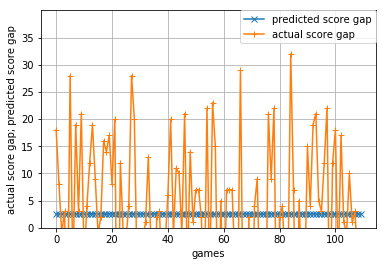

In [13]:
# Visulization of prediction 
import matplotlib.pyplot as plt
pred_list = list(pred)
y_out_list = list(y_out)
fig, ax = plt.subplots()
plt.xlabel('games')
plt.ylabel('actual score gap; predicted score gap')
yticks = range(0,40,5)
ax.set_yticks(yticks)
ax.set_ylim([0,40])
x = list(range(len(out_of_sample)))
plt.plot(x,pred_list,"x-",label="predicted score gap")
plt.plot(x,y_out_list,"+-",label="actual score gap")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)
